In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
#Loading the dataset
df = pd.read_csv(r"DG_preprocessing.csv")
df.head()

,label,full_text,digit
0,False,abortion says annies list political group supp...,0
1,True,energy history job accomplishments decline coa...,1
2,True,foreign policy hillary clinton agrees john mcc...,1
3,True,education chicago bears starting quarterbacks ...,1
4,True,ethics m person stage worked actively just las...,1


In [3]:
df['full_text'] = df['full_text'].fillna('')
df['full_text'][1]

df.isnull().sum()

label        0
full_text    0
digit        0
dtype: int64

In [4]:
unique_labels = df['label'].unique()
print(unique_labels)

[False  True]


In [5]:
df.isnull().sum()

label        0
full_text    0
digit        0
dtype: int64

In [6]:
#Performing text vectorization
Vectorizer = TfidfVectorizer()
X = Vectorizer.fit_transform(df['full_text'])
Y = df['label']

In [7]:
#Splitting the dataset into train and test sets
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [8]:
#Creating and training the SVM model
SVMModel = SVC(random_state=42)
SVMModel.fit(X_Train, Y_Train)

SVC(random_state=42)

In [9]:
#Making predictions on the testing set
Y_Pred = SVMModel.predict(X_Test)

In [15]:
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support

#Printing classification report
print("Classification Report:")
report = classification_report(Y_Test, Y_Pred, target_names=['fake', 'real'])
print(report)

#Calculating and print accuracy
accuracy = accuracy_score(Y_Test, Y_Pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

#Calculating precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_Test, Y_Pred, average=None)

#Printing precision, recall, and F1-score in percentage
print("Precision (Fake): {:.2f}%".format(precision[0] * 100))
print("Precision (Real): {:.2f}%".format(precision[1] * 100))
print("Recall (Fake): {:.2f}%".format(recall[0] * 100))
print("Recall (Real): {:.2f}%".format(recall[1] * 100))
print("F1-Score (Fake): {:.2f}%".format(f1_score[0] * 100))
print("F1-Score (Real): {:.2f}%".format(f1_score[1] * 100))

Classification Report:
              precision    recall  f1-score   support

        fake       0.96      0.88      0.92      7920
        real       0.90      0.97      0.93      8292

    accuracy                           0.93     16212
   macro avg       0.93      0.93      0.93     16212
weighted avg       0.93      0.93      0.93     16212

Accuracy: 92.60%
Precision (Fake): 96.17%
Precision (Real): 89.69%
Recall (Fake): 88.37%
Recall (Real): 96.64%
F1-Score (Fake): 92.10%
F1-Score (Real): 93.03%


In [16]:
from sklearn.metrics import confusion_matrix

#Assuming Y_Test and Y_Pred are the true labels and predicted labels, respectively

#Calculating confusion matrix
conf_matrix = confusion_matrix(Y_Test, Y_Pred)

#Extracting TP, FP, TN, FN from confusion matrix
TP = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
TN = conf_matrix[1, 1]
FN = conf_matrix[1, 0]

#Printing explanations and corresponding numbers
print("\033[1mTrue Positive: The number of instances, when the model predicted FAKE news as FAKE only \033[0m ")
print("True Positive:", TP)
print()
print("\033[1mFalse Positive: The number of instances, when the model predicted as FAKE news, but it is a REAL news\033[0m")
print("False Positive:", FP)
print()
print("\033[1mFalse Negative: The number of instances, when the model predicted as REAL news, but it is a FAKE news\033[0m")
print("False Negative:", FN)
print()
print("\033[1mTrue Negative: The number of instances, when the model predicted REAL news as REAL only\033[0m")
print("True Negative:", TN)


True Positive: The number of instances, when the model predicted FAKE news as FAKE only  
True Positive: 6999

False Positive: The number of instances, when the model predicted as FAKE news, but it is a REAL news
False Positive: 921

False Negative: The number of instances, when the model predicted as REAL news, but it is a FAKE news
False Negative: 279

True Negative: The number of instances, when the model predicted REAL news as REAL only
True Negative: 8013


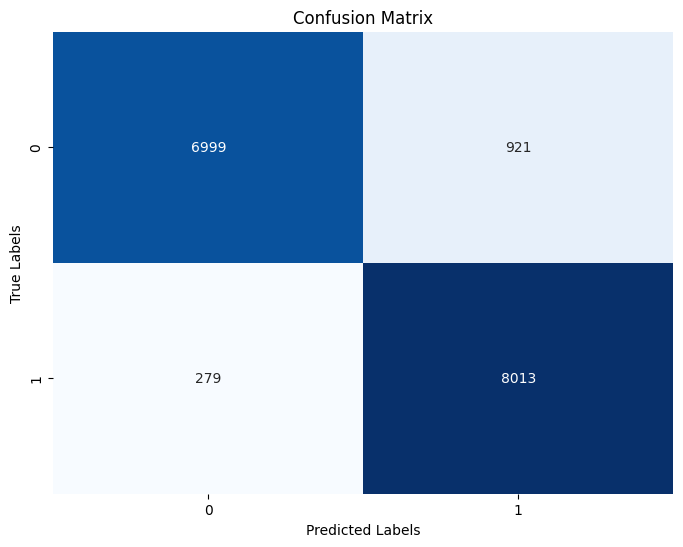

In [17]:
#Creating a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

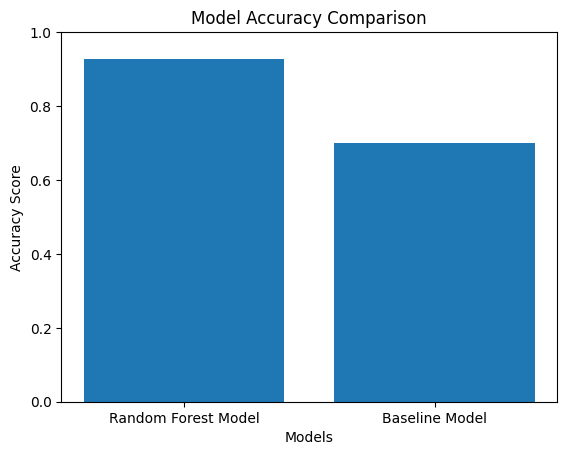

In [18]:
AccuracyScores = [accuracy_score(Y_Test, Y_Pred), 0.70]  
Models = ['Random Forest Model', 'Baseline Model']

plt.bar(Models, AccuracyScores)
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.ylim([0, 1])  #Setting the y-axis limits between 0 and 1
plt.show()

In [19]:
# Assuming you have a trained Random Forest model named 'rf_model'
# Assuming you have a sentence to test named 'sentence'
# Assuming you have the vectorizer used for training named 'Vectorizer'

# Preprocess the sentences (vectorize them) using the same vectorizer used for training
X_test = Vectorizer.transform(['health care states says the paperback edition of mitt romneys book deleted line that massachusetts individual mandate should be the model for the country 42 governor republican '])
X_test2 = Vectorizer.transform(['energy history job accomplishments when did the decline of coal start it started when natural gas took off that started to begin in president george w bushs administration 1 state delegate democrat '])

# Make predictions
prediction = SVMModel.predict(X_test)
prediction2 = SVMModel.predict(X_test2)

print("The first statement prediction is:", prediction)
print("The second statement prediction is:", prediction2)

The first statement prediction is: [ True]
The second statement prediction is: [ True]
